<a href="https://colab.research.google.com/github/NatashaKamami/Advanced_ML/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the necessary libraries and loading the dataset**

In [ ]:
# Data Explotation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Visualization

# Data Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **Overview of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


## **Data Cleaning**

In [ ]:
# Dropping null values
df.dropna(inplace=True)

In [ ]:
# Changing the data types of the columns containing dates into the correct data type (datetime)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')
df["Year_Birth"] = pd.to_datetime(df["Year_Birth"], format='%Y')

In [ ]:
# dropping unnecessary columns
df.drop(columns=['ID'], inplace=True)

## **Data preprocesing**

In [ ]:
# One hot encoding the categorical columns
data = pd.get_dummies(df[["Education", "Marital_Status"]], drop_first=True).astype(int)
df = pd.concat([df, data], axis = 1)
df.drop(["Education", "Marital_Status"], axis = 1, inplace = True)

In [ ]:
# Select numerical features for clustering
features=df.drop('Dt_Customer',axis=1)
features.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## **Clustering using K-Means**

### **Plotting the elbow method to visualize the optimal number of clusters**

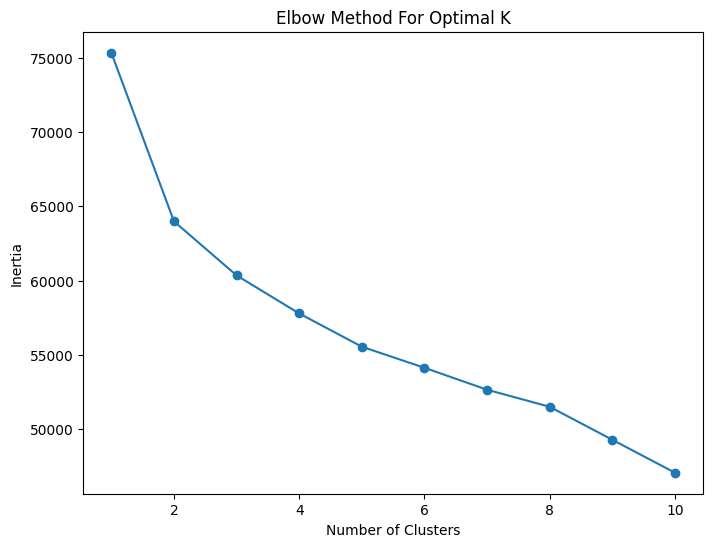

In [ ]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Try K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled) # Fit on scaled data
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### **Fitting the model and adding the cluster labels into the dataset**

In [ ]:
# Define the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust the number of clusters as needed

# Fit the model
kmeans.fit(features_scaled) # Fit on the scaled features, not the original df

# Get the cluster labels (which cluster each sample belongs to)
df['Cluster'] = kmeans.labels_ # Access labels directly from kmeans

# Show the first few rows of the DataFrame with clusters
print(df.head())

   Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0  2012-09-04       58       635   
1        1954  46344.0        1         1  2014-03-08       38        11   
2        1965  71613.0        0         0  2013-08-21       26       426   
3        1984  26646.0        1         0  2014-02-10       26        11   
4        1981  58293.0        1         0  2014-01-19       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Education_Master  \
0         88              546              172  ...                 0   
1          1                6                2  ...                 0   
2         49              127              111  ...                 0   
3          4               20               10  ...                 0   
4         43              118               46  ...                 0   

   Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  \
0              0                     

In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
1,1343
0,873


## **PCA for dimensionality reduction and to help with visualizing the clusters**

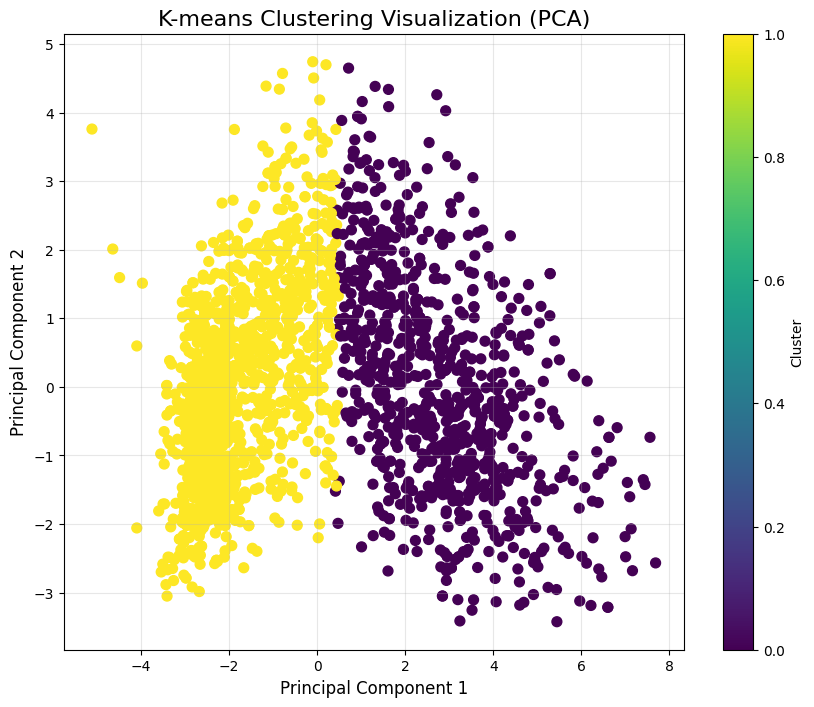

In [ ]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

# Visualize Clusters in 2D Space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering Visualization (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.show()


## **Visualization to see how the clusters differ/separate in terms of recency and income**

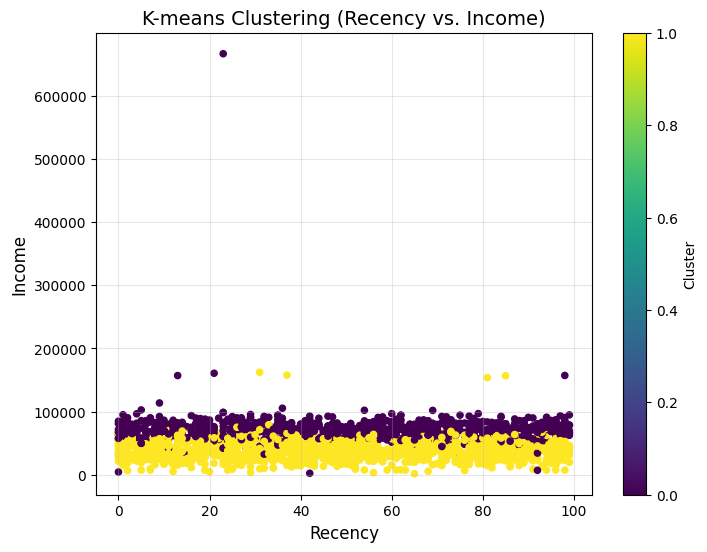

In [ ]:
# Scatter plot of clusters based on recency and income
plt.figure(figsize=(8, 6))

# Scatter plot with clusters identified by color
plt.scatter(df['Recency'], df['Income'], c=df['Cluster'], cmap='viridis', s=20)

# Formatting the plot
plt.title('K-means Clustering (Recency vs. Income)', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.show()
